In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analyzing EMG Trial Runs in Recording Folder

In [45]:
### IMPORTS AND PARAMETERS
import os
import datetime

RECORDING_FOLDER = "recordings"

In [16]:
# First grab files from recording folder
obj = os.scandir(RECORDING_FOLDER)
file_names = []
for file in obj:
    file_names.append(file)

[<DirEntry 'TRIAL_10Nov-05-2022'>, <DirEntry 'TRIAL_1Nov-05-2022'>, <DirEntry 'TRIAL_2Nov-05-2022'>, <DirEntry 'TRIAL_3Nov-05-2022'>, <DirEntry 'TRIAL_4Nov-05-2022'>, <DirEntry 'TRIAL_5Nov-05-2022'>, <DirEntry 'TRIAL_6Nov-05-2022'>, <DirEntry 'TRIAL_7Nov-05-2022'>, <DirEntry 'TRIAL_8Nov-05-2022'>, <DirEntry 'TRIAL_9Nov-05-2022'>]
<DirEntry 'TRIAL_1Nov-05-2022'>


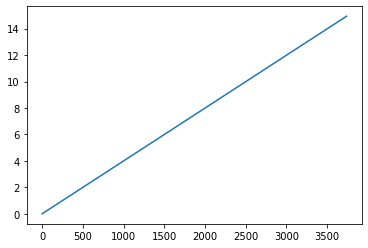

In [85]:
file_names.sort(key=lambda x: x.name)
print(file_names)
specific_file = file_names[1]
print(specific_file)
df = pd.read_csv(specific_file)
times = df["Timestamp Channel"] - df["Timestamp Channel"].min()
df["Timestamp Channel"] = times
plt.plot(df["Timestamp Channel"])

0
6      -1.870549
7      -1.821933
8      -1.794128
9      -1.815071
10     -1.825666
          ...   
3734   -0.340885
3735   -0.343813
3736   -0.280177
3737   -0.255724
3738   -0.277763
Name: EMG Channel 1, Length: 3733, dtype: float64


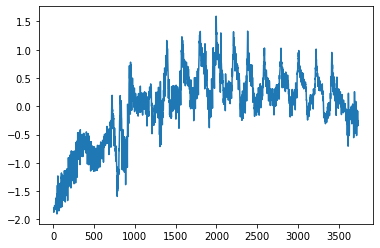

In [86]:

print(np.argmax(df["EMG Channel 1"]))
corrected_emg = (df["EMG Channel 1"][6:] - df["EMG Channel 1"][6:].mean()) / 1000
print(corrected_emg)
plt.plot(corrected_emg)

In [87]:
from scipy.fftpack import fft
FFT_emg = fft(corrected_emg.values)

[-1.61870517e-13  -0.j         -1.00111034e+03+697.03762399j
 -1.31044964e+02+497.04833809j ... -1.87702557e+02-247.38979818j
 -1.31044964e+02-497.04833809j -1.00111034e+03-697.03762399j]


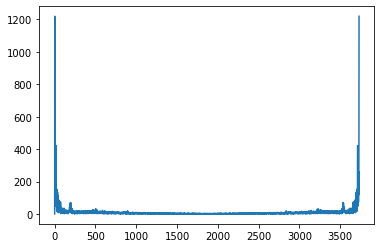

In [88]:
print(FFT_emg)
plt.plot(np.abs(FFT_emg))